Weather Features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sn
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,5



In [2]:
df_weather = pd.read_csv('weather_features.csv')
df_weather.head()

dt_iso city_name     temp  temp_min  temp_max  pressure  \
0  2015-01-01 00:00:00+01:00  Valencia  270.475   270.475   270.475      1001   
1  2015-01-01 01:00:00+01:00  Valencia  270.475   270.475   270.475      1001   
2  2015-01-01 02:00:00+01:00  Valencia  269.686   269.686   269.686      1002   
3  2015-01-01 03:00:00+01:00  Valencia  269.686   269.686   269.686      1002   
4  2015-01-01 04:00:00+01:00  Valencia  269.686   269.686   269.686      1002   

   humidity  wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  \
0        77           1        62      0.0      0.0      0.0           0   
1        77           1        62      0.0      0.0      0.0           0   
2        78           0        23      0.0      0.0      0.0           0   
3        78           0        23      0.0      0.0      0.0           0   
4        78           0        23      0.0      0.0      0.0           0   

   weather_id weather_main weather_description weather_icon  
0         800        clear        sky is clear          01n  
1         800        clear        sky is clear          01n  
2         800        clear        sky is clear          01n  
3         800        clear        sky is clear          01n  
4         800        clear        sky is clear          01n

In [3]:
df_weather.tail()

dt_iso city_name    temp  temp_min  temp_max  \
178391  2018-12-31 19:00:00+01:00   Seville  287.76    287.15    288.15   
178392  2018-12-31 20:00:00+01:00   Seville  285.76    285.15    286.15   
178393  2018-12-31 21:00:00+01:00   Seville  285.15    285.15    285.15   
178394  2018-12-31 22:00:00+01:00   Seville  284.15    284.15    284.15   
178395  2018-12-31 23:00:00+01:00   Seville  283.97    282.15    285.15   

        pressure  humidity  wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  \
178391      1028        54           3        30      0.0      0.0      0.0   
178392      1029        62           3        30      0.0      0.0      0.0   
178393      1028        58           4        50      0.0      0.0      0.0   
178394      1029        57           4        60      0.0      0.0      0.0   
178395      1029        70           3        50      0.0      0.0      0.0   

        clouds_all  weather_id weather_main weather_description weather_icon  
178391           0         800        clear        sky is clear          01n  
178392           0         800        clear        sky is clear          01n  
178393           0         800        clear        sky is clear          01n  
178394           0         800        clear        sky is clear          01n  
178395           0         800        clear        sky is clear          01n

In [4]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
dt_iso                 178396 non-null object
city_name              178396 non-null object
temp                   178396 non-null float64
temp_min               178396 non-null float64
temp_max               178396 non-null float64
pressure               178396 non-null int64
humidity               178396 non-null int64
wind_speed             178396 non-null int64
wind_deg               178396 non-null int64
rain_1h                178396 non-null float64
rain_3h                178396 non-null float64
snow_3h                178396 non-null float64
clouds_all             178396 non-null int64
weather_id             178396 non-null int64
weather_main           178396 non-null object
weather_description    178396 non-null object
weather_icon           178396 non-null object
dtypes: float64(6), int64(6), object(5)
memory usage: 23.1+ MB


In [5]:
from datetime import datetime
df_weather['dt_iso']=pd.to_datetime(df_weather['dt_iso'],utc=True,format='%Y-%m-%d %H:%M:%S')
timeindexed_df_weather=df_weather.set_index(['dt_iso'])

timeindexed_df_weather.head()

city_name     temp  temp_min  temp_max  pressure  \
dt_iso                                                                       
2014-12-31 23:00:00+00:00  Valencia  270.475   270.475   270.475      1001   
2015-01-01 00:00:00+00:00  Valencia  270.475   270.475   270.475      1001   
2015-01-01 01:00:00+00:00  Valencia  269.686   269.686   269.686      1002   
2015-01-01 02:00:00+00:00  Valencia  269.686   269.686   269.686      1002   
2015-01-01 03:00:00+00:00  Valencia  269.686   269.686   269.686      1002   

                           humidity  wind_speed  wind_deg  rain_1h  rain_3h  \
dt_iso                                                                        
2014-12-31 23:00:00+00:00        77           1        62      0.0      0.0   
2015-01-01 00:00:00+00:00        77           1        62      0.0      0.0   
2015-01-01 01:00:00+00:00        78           0        23      0.0      0.0   
2015-01-01 02:00:00+00:00        78           0        23      0.0      0.0   
2015-01-01 03:00:00+00:00        78           0        23      0.0      0.0   

                           snow_3h  clouds_all  weather_id weather_main  \
dt_iso                                                                    
2014-12-31 23:00:00+00:00      0.0           0         800        clear   
2015-01-01 00:00:00+00:00      0.0           0         800        clear   
2015-01-01 01:00:00+00:00      0.0           0         800        clear   
2015-01-01 02:00:00+00:00      0.0           0         800        clear   
2015-01-01 03:00:00+00:00      0.0           0         800        clear   

                          weather_description weather_icon  
dt_iso                                                      
2014-12-31 23:00:00+00:00        sky is clear          01n  
2015-01-01 00:00:00+00:00        sky is clear          01n  
2015-01-01 01:00:00+00:00        sky is clear          01n  
2015-01-01 02:00:00+00:00        sky is clear          01n  
2015-01-01 03:00:00+00:00        sky is clear          01n

In [6]:
# Drop unusable columns

#df_weather = df_weather.drop(['generation fossil coal-derived gas','generation fossil oil shale'], axis=1)


In [7]:
#mapping cities in Spain (from dataset)  
import folium
cities_in_Spain = [(41.398371, 2.1741),(43.260919,-2.938764),(40.412752,-3.707721),(37.382826,-5.973167),(39.466667,-0.366667)]
m = folium.Map(location=[70, 100],zoom_start=1)

folium.Marker(location=cities_in_Spain[0]).add_to(m)
folium.Marker(location=cities_in_Spain[1]).add_to(m)
folium.Marker(location=cities_in_Spain[2]).add_to(m)
folium.Marker(location=cities_in_Spain[3]).add_to(m)
folium.Marker(location=cities_in_Spain[4]).add_to(m)

m

In [8]:
weather_data_Madrid = pd.read_csv('weather_Madrid.csv')
weather_data_Madrid['dt_iso']=pd.to_datetime(weather_data_Madrid['dt_iso'],utc=True,format='%Y-%m-%d %H:%M:%S')
timeindexed_weather_data_Madrid=weather_data_Madrid.set_index(['dt_iso'])
timeindexed_weather_data_Madrid.head()

city_name     temp  temp_min  temp_max  pressure  \
dt_iso                                                                       
2014-12-31 23:00:00+00:00    Madrid  267.325   267.325   267.325       971   
2015-01-01 00:00:00+00:00    Madrid  267.325   267.325   267.325       971   
2015-01-01 01:00:00+00:00    Madrid  266.186   266.186   266.186       971   
2015-01-01 02:00:00+00:00    Madrid  266.186   266.186   266.186       971   
2015-01-01 03:00:00+00:00    Madrid  266.186   266.186   266.186       971   

                           humidity  wind_speed  wind_deg  rain_1h  rain_3h  \
dt_iso                                                                        
2014-12-31 23:00:00+00:00        63           1       309      0.0      0.0   
2015-01-01 00:00:00+00:00        63           1       309      0.0      0.0   
2015-01-01 01:00:00+00:00        64           1       273      0.0      0.0   
2015-01-01 02:00:00+00:00        64           1       273      0.0      0.0   
2015-01-01 03:00:00+00:00        64           1       273      0.0      0.0   

                           snow_3h  clouds_all  weather_id weather_main  \
dt_iso                                                                    
2014-12-31 23:00:00+00:00      0.0           0         800        clear   
2015-01-01 00:00:00+00:00      0.0           0         800        clear   
2015-01-01 01:00:00+00:00      0.0           0         800        clear   
2015-01-01 02:00:00+00:00      0.0           0         800        clear   
2015-01-01 03:00:00+00:00      0.0           0         800        clear   

                          weather_description weather_icon  
dt_iso                                                      
2014-12-31 23:00:00+00:00        sky is clear          01n  
2015-01-01 00:00:00+00:00        sky is clear          01n  
2015-01-01 01:00:00+00:00        sky is clear          01n  
2015-01-01 02:00:00+00:00        sky is clear          01n  
2015-01-01 03:00:00+00:00        sky is clear          01n

In [9]:
timeindexed_weather_data_Madrid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36263 entries, 2014-12-31 23:00:00+00:00 to 2018-12-31 22:00:00+00:00
Data columns (total 16 columns):
city_name              36263 non-null object
temp                   36263 non-null float64
temp_min               36263 non-null float64
temp_max               36263 non-null float64
pressure               36263 non-null int64
humidity               36263 non-null int64
wind_speed             36263 non-null int64
wind_deg               36263 non-null int64
rain_1h                36263 non-null float64
rain_3h                36263 non-null float64
snow_3h                36263 non-null float64
clouds_all             36263 non-null int64
weather_id             36263 non-null int64
weather_main           36263 non-null object
weather_description    36263 non-null object
weather_icon           36263 non-null object
dtypes: float64(6), int64(6), object(4)
memory usage: 4.7+ MB


In [10]:
#making new data frame with temperature in Madrid and replacing information for temperature,°C = K - 273,15

temp_Madrid=timeindexed_weather_data_Madrid['temp']
temp_Madrid=temp_Madrid.apply(lambda x:x-273,15)
temp_Madrid.describe()


count    36263.000000
mean        15.060881
std          9.298953
min         -8.868000
25%          8.120000
50%         13.580000
75%         21.720000
max         40.330000
Name: temp, dtype: float64

C:\Users\pc\Anaconda3\Lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


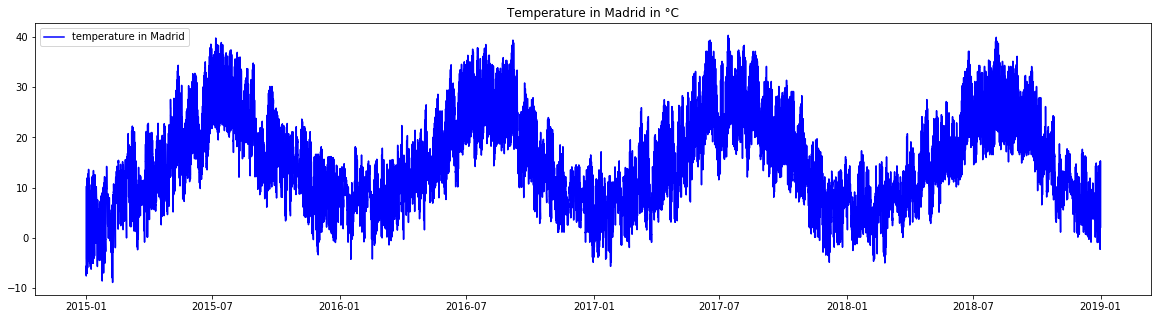

In [11]:
#plotting temperature 
rcParams['figure.figsize']=20,5
t=plt.plot(temp_Madrid,color='blue',label='temperature in Madrid')
plt.legend(loc='best')
plt.title('Temperature in Madrid in °C')
plt.show(block=False)

In [12]:
#making new data frame with wind speed (m/s) in Madrid 

wind_speed_Madrid=timeindexed_weather_data_Madrid['wind_speed']

wind_speed_Madrid.describe()


count    36263.000000
mean         2.441773
std          1.977863
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         18.000000
Name: wind_speed, dtype: float64

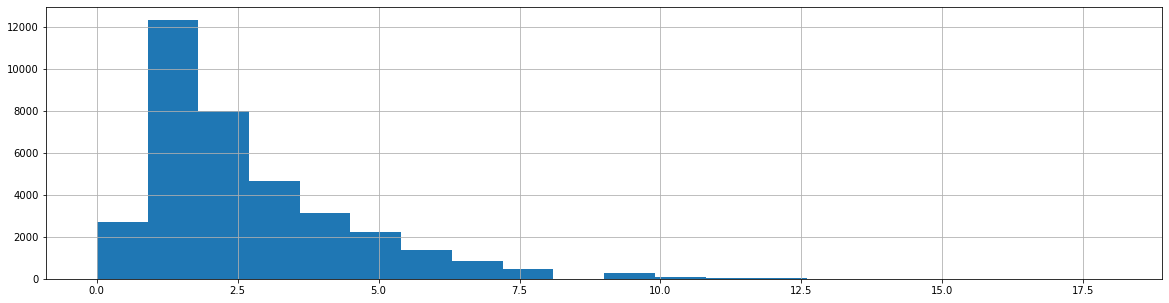

In [13]:
#Histogram of wind speed data in Madrid (frequency of different hourly wind speeds)
wind_speed_Madrid.hist(bins=20)

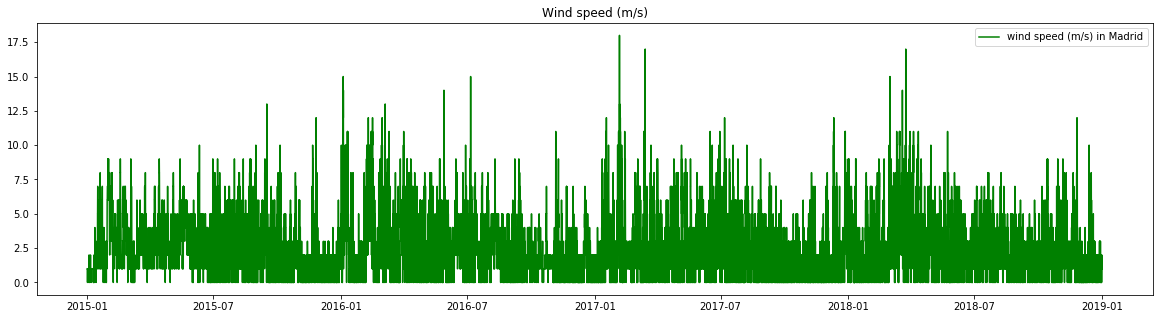

In [14]:
#plotting temperature 
#t=plt.plot(temp_Madrid[len(temp_Madrid)-365:],color='blue',label='temperature in Madrid')

#plotting wind speed
rcParams['figure.figsize']=20,5
wind=plt.plot(wind_speed_Madrid,color='green',label='wind speed (m/s) in Madrid')
plt.legend(loc='best')
plt.title('Wind speed (m/s)')
plt.show(block=False)

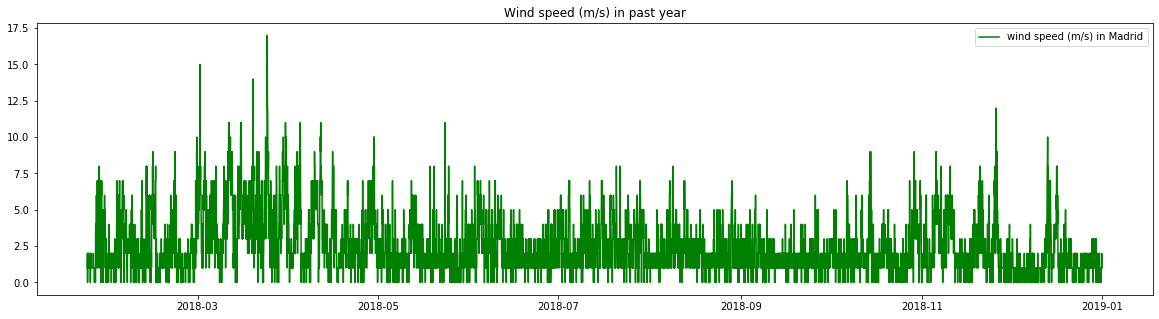

In [15]:
#plotting wind speed
rcParams['figure.figsize']=20,5
wind=plt.plot(wind_speed_Madrid[len(wind_speed_Madrid)-365*24:],color='green',label='wind speed (m/s) in Madrid')
plt.legend(loc='best')
plt.title('Wind speed (m/s) in past year')
plt.show(block=False)

In [16]:
df_load = pd.read_csv('energy_dataset.csv')
#dropping all column except total load actual and time
df_load = df_load.drop(['generation fossil coal-derived gas','generation fossil oil shale', 
                            'generation fossil peat', 'generation geothermal', 
                            'generation hydro pumped storage aggregated', 'generation marine', 
                            'generation wind offshore', 'forecast wind offshore eday ahead', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'price day ahead',
       'price actual'], 
                            axis=1)
df_load.columns
df_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 2 columns):
time                 35064 non-null object
total load actual    35028 non-null float64
dtypes: float64(1), object(1)
memory usage: 548.0+ KB


In [17]:
#setting time index in df_load
df_load['time']=pd.to_datetime(df_load['time'],utc=True,format='%Y-%m-%d %H:%M:%S')
timeindexed_df_load=df_load.set_index(['time'])
timeindexed_df_load.head()

total load actual
time                                        
2014-12-31 23:00:00+00:00            25385.0
2015-01-01 00:00:00+00:00            24382.0
2015-01-01 01:00:00+00:00            22734.0
2015-01-01 02:00:00+00:00            21286.0
2015-01-01 03:00:00+00:00            20264.0

In [18]:
timeindexed_df_load.describe()

total load actual
count       35028.000000
mean        28696.939905
std          4574.987950
min         18041.000000
25%         24807.750000
50%         28901.000000
75%         32192.000000
max         41015.000000

Actual total Load (including losses without stored energy) = Net Generation – Exports + Imports – Absorbed Energy

In [19]:
#separating load data for past one year
load_data_past_year=timeindexed_df_load[len(df_load)-365*24:].copy() 
#load_data_past_year.index = range(0,8760)
load_data_past_year.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2017-12-31 23:00:00+00:00 to 2018-12-31 22:00:00+00:00
Data columns (total 1 columns):
total load actual    8758 non-null float64
dtypes: float64(1)
memory usage: 136.9 KB


In [20]:
load_data_past_year.tail()

total load actual
time                                        
2018-12-31 18:00:00+00:00            30653.0
2018-12-31 19:00:00+00:00            29735.0
2018-12-31 20:00:00+00:00            28071.0
2018-12-31 21:00:00+00:00            25801.0
2018-12-31 22:00:00+00:00            24455.0

In [21]:
#separating wind speed data for past one year
windspeed_data_past_year_Madrid=wind_speed_Madrid[len(weather_data_Madrid)-365*24-26*24-9:].copy() 
#windspeed_data_past_year_Madrid.index = range(0,8760)
windspeed_data_past_year_Madrid.head()

dt_iso
2017-12-31 23:00:00+00:00    6
2018-01-01 00:00:00+00:00    4
2018-01-01 01:00:00+00:00    5
2018-01-01 02:00:00+00:00    5
2018-01-01 03:00:00+00:00    5
Name: wind_speed, dtype: int64

In [22]:
windspeed_data_past_year_Madrid.tail()

dt_iso
2018-12-31 18:00:00+00:00    1
2018-12-31 19:00:00+00:00    1
2018-12-31 20:00:00+00:00    1
2018-12-31 21:00:00+00:00    2
2018-12-31 22:00:00+00:00    1
Name: wind_speed, dtype: int64

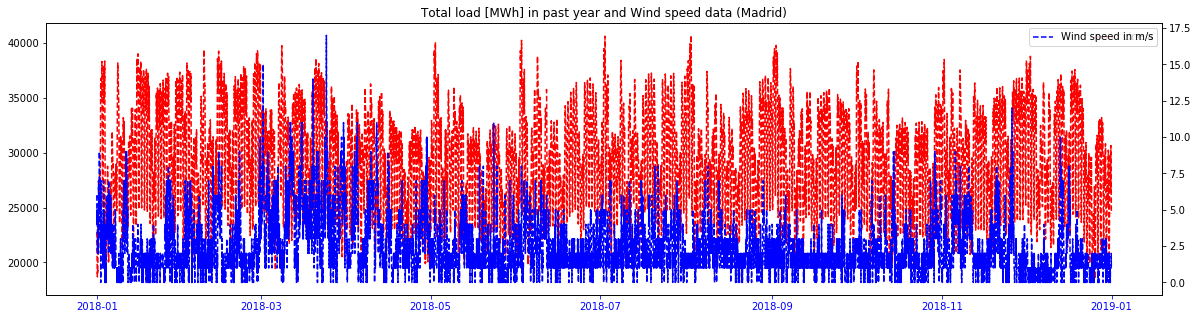

In [23]:
fig, ax = plt.subplots()
plt.plot(load_data_past_year, '--r', label='Line a')
plt.legend()
ax.tick_params('x', colors='r')

# Get second axis
ax2 = ax.twinx()
plt.plot(windspeed_data_past_year_Madrid, '--b', label='Wind speed in m/s')
#plt.plot(temp_Madrid[len(temp_Madrid)-365*24:], '--g', label='Te')
plt.legend()
ax.tick_params('x', colors='b')

plt.legend(loc='best')
plt.title('Total load [MWh] in past year and Wind speed data (Madrid)')
plt.show(block=False)

In [24]:
#separating temperature data for past one year
temperature_data_past_year_Madrid=temp_Madrid[len(temp_Madrid)-365*24-26*24-9:].copy() 
#temperature_data_past_year_Madrid.index = range(0,8760)
temperature_data_past_year_Madrid.head()

dt_iso
2017-12-31 23:00:00+00:00    6.44
2018-01-01 00:00:00+00:00    6.58
2018-01-01 01:00:00+00:00    7.58
2018-01-01 02:00:00+00:00    7.13
2018-01-01 03:00:00+00:00    6.01
Name: temp, dtype: float64

In [25]:
#temperature_data_past_year_Madrid

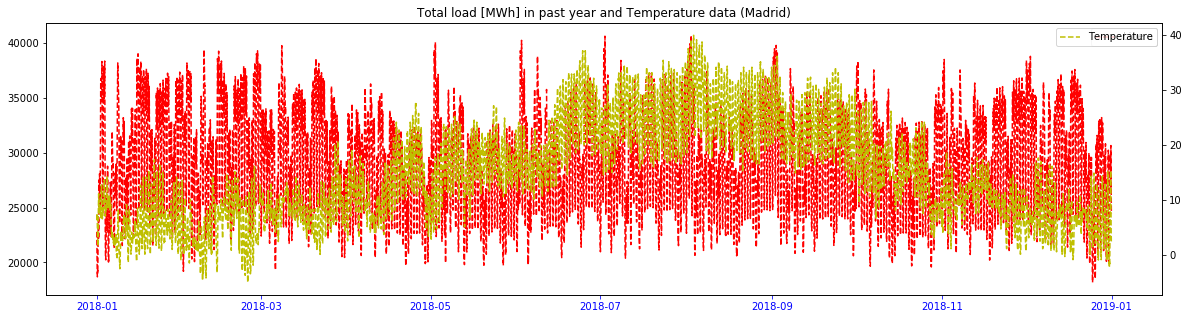

In [26]:
fig, ax = plt.subplots()
plt.plot(load_data_past_year, '--r',label='Line a')
plt.legend()
ax.tick_params('x', colors='r')
# Get second axis
ax2 = ax.twinx()
#plt.plot(wind_speed_Madrid[len(wind_speed_Madrid)-365*24:], '--g', label='Wind speed in m/s')
plt.plot(temperature_data_past_year_Madrid, '--y', label='Temperature')
plt.legend()
ax.tick_params('x', colors='b')

plt.legend(loc='best')
plt.title('Total load [MWh] in past year and Temperature data (Madrid)')
plt.show(block=False)

In [27]:
import plotly
#from plotly.offline import init_notebook_mode
import plotly.graph_objs as go
from plotly.offline import *
plotly.offline.init_notebook_mode(connected=True)
data=[go.Scatter(x=load_data_past_year.index,
                y=load_data_past_year['total load actual'],  name=''
)]
layout = go.Layout(
    title='Load, one year data',
    yaxis=dict(
        title='load data MWh'
    )
)
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig)

In [28]:
#import plotly.plotly as py
#import plotly.graph_objs as go
data1 = go.Scatter(x=load_data_past_year.index,
                y=load_data_past_year['total load actual'],
                name='one year load data'
)
data2 = go.Scatter(
    x=temperature_data_past_year_Madrid.index,
    y=temperature_data_past_year_Madrid,
    name='temperature data',
    yaxis='y2'
)
data = [data1, data2]
layout = go.Layout(
    title='Load and temperature, one year data',
    yaxis=dict(
        title='load data MWh'
    ),
    yaxis2=dict(
        title='temperature data',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right'
    )
)
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig)

In [29]:
data1 = go.Scatter(x=load_data_past_year.index,
                y=load_data_past_year['total load actual'],
                name='one year load data'
)
data3 = go.Scatter(
    x=windspeed_data_past_year_Madrid.index,
    y=windspeed_data_past_year_Madrid,
    name='wind speed data',
    yaxis='y2'
)
data = [data1, data3]
layout = go.Layout(
    title='Load and windspeed, one year data',
    yaxis=dict(
        title='load data MWh'
    ),
    yaxis2=dict(
        title='wind speed data',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right'
    )
)
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig)